In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [174]:
data = yf.download("^NSEI",period="10y",interval="1mo")

[*********************100%***********************]  1 of 1 completed


In [175]:
data.sort_values(by='Date',inplace=True)

In [176]:
data['Max Fall Percentage'] = np.abs((data['Open'] - data['Low'])/data['Open'] * 100)

In [177]:
data['Max Rise Percentage'] = np.abs((data['Open'] - data['High'])/data['Open'] * 100)

In [178]:
data['Range'] = (data['High'] - data['Low'])
data['Range Percentage'] = (data['High'] - data['Low']) / data['Open'] * 100

In [179]:
data['Percent Change'] = np.abs((data['Adj Close'] - data['Open']))/data['Open'] * 100

In [180]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Max Fall Percentage,Max Rise Percentage,Range,Range Percentage,Percent Change
Date,,,,,,,,,,,
2011-02-01,5537.299805,5599.250000,5177.700195,5333.250000,5333.250000,0,6.494133,1.118780,421.549805,7.612913,3.685006
2011-03-01,5382.000000,5872.000000,5348.200195,5833.750000,5833.750000,0,0.628016,9.104422,523.799805,9.732438,8.393720
2011-04-01,5835.000000,5944.450195,5693.250000,5749.500000,5749.500000,0,2.429306,1.875753,251.200195,4.305059,1.465296
2011-05-01,5766.899902,5775.250000,5328.700195,5473.100098,5473.100098,0,7.598532,0.144794,446.549805,7.743325,5.094588
2011-06-01,5561.049805,5657.899902,5195.899902,5647.399902,5647.399902,0,6.566204,1.741579,462.000000,8.307784,1.552766


In [181]:
data[['Max Fall Percentage', 'Max Rise Percentage', 'Range',
       'Range Percentage', 'Percent Change']].describe().iloc[1:].drop('std',axis=0)

,Max Fall Percentage,Max Rise Percentage,Range,Range Percentage,Percent Change
mean,3.722135,3.559735,600.054131,7.281869,3.792983
min,0.000000,0.000000,142.000000,2.415685,0.148273
25%,1.064097,1.101155,381.100586,4.742280,1.327144
50%,2.682041,2.458220,511.400391,6.340125,3.144049
75%,5.038667,4.964978,742.500000,8.514478,5.169281
max,34.039962,15.201946,3921.899902,34.440849,24.497356


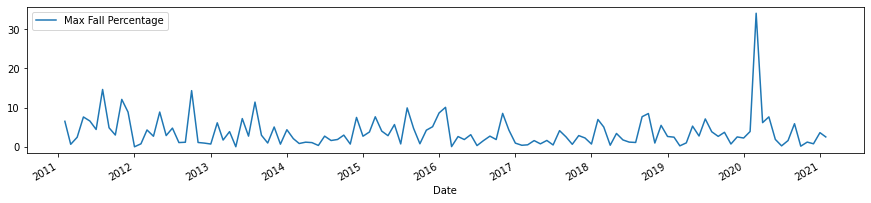

In [186]:
plt.rcParams["figure.figsize"] = (15,3)

data[['Max Fall Percentage']].plot()

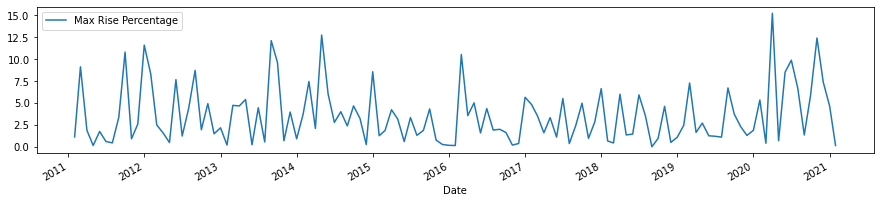

In [187]:
data[['Max Rise Percentage']].plot()

In [183]:
data['Range Percentage'].quantile(.9)

11.233961804880963

### **Conclusion - Monthly**



*   Nifty has moved an average of 3.79%(in either direction) in a month in the last 10 years.
*   A Monthly Options strategy which can cover a total range of 8.51% has a 75% probability of being successful, in the long run.
* For an accuracy of more than 90% in the long run, you will need to cover a monthly range of approximately 11%.
*   Hedging is very much necessary to protect yourself from a black swan event like 2008 or 2020.
* Normal Strategies like Iron Condor can easily provide a 10-12% range, which means over the long run, they can have an accuracy of over 75%, based on past data.



In [195]:
def generate_nifty_report(data):
  data.sort_values(by='Date',inplace=True)
  data['Max Fall Percentage'] = np.abs((data['Open'] - data['Low'])/data['Open'] * 100)
  data['Max Rise Percentage'] = np.abs((data['Open'] - data['High'])/data['Open'] * 100)
  data['Range'] = (data['High'] - data['Low'])
  data['Range Percentage'] = (data['High'] - data['Low']) / data['Open'] * 100
  data['Percent Change'] = np.abs((data['Adj Close'] - data['Open']))/data['Open'] * 100
  report = data[['Max Fall Percentage', 'Max Rise Percentage', 'Range',
       'Range Percentage', 'Percent Change']].describe().iloc[1:].drop('std',axis=0)
  return data,report

In [189]:
data_weekly = yf.download("^NSEI",period="10y",interval="1wk")

[*********************100%***********************]  1 of 1 completed


In [196]:
data,weekly_report =generate_nifty_report(data_weekly)

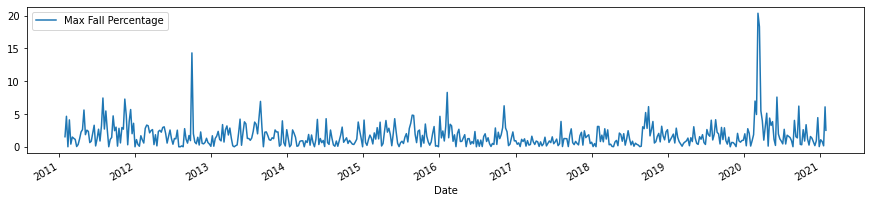

In [197]:
data[['Max Fall Percentage']].plot()

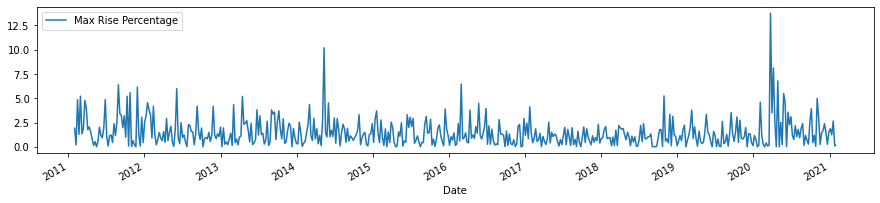

In [198]:
data[['Max Rise Percentage']].plot()